In [1]:
#Loading required libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from bokeh.plotting import figure
from bokeh.tile_providers import get_provider, Vendors
from bokeh.models import HoverTool
from bokeh.io import output_notebook, show
from bokeh.plotting import figure

output_notebook()

Loading BokehJS ...

In [2]:
# Loading the dataset
data = pd.read_excel("Interview Challenge.xlsx")
data

,id,latitudes/0,latitudes/1,latitudes/2,latitudes/3,longitudes/0,longitudes/1,longitudes/2,longitudes/3,latitudes/4,longitudes/4,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,7590cf21d1a446e3b07c92912a4a3c44,2.980511,2.980595,2.980763,2.980530,32.531686,32.531705,32.531327,32.531240,2.980515,32.531657,NaN,NaN,NaN,NaN,NaN
1,c7b3fde63650440abbaaecec33e30bfa,2.965254,2.965177,2.965122,2.966003,32.249756,32.250017,32.250278,32.250418,2.965983,32.249870,NaN,NaN,NaN,NaN,s
2,ef2b90b7ff804894a8413477cdfa0e86,2.961134,2.961096,2.961096,2.961162,32.240426,32.240401,32.240401,32.240312,2.960957,32.240535,NaN,NaN,NaN,NaN,NaN
3,604a8069c5bb4620b7394a7ec5603c18,2.961075,2.961193,2.960932,2.960932,32.240455,32.240537,32.240490,32.240490,2.961053,32.240440,NaN,NaN,NaN,NaN,NaN
4,9848201f11824ca5a7639aee61152122,2.960971,2.961101,2.961128,2.961035,32.240536,32.240386,32.240551,32.240573,2.960998,32.240462,NaN,NaN,NaN,NaN,NaN


In [3]:
# Getting a concise summary of a DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 16 columns):
id              5 non-null object
latitudes/0     5 non-null float64
latitudes/1     5 non-null float64
latitudes/2     5 non-null float64
latitudes/3     5 non-null float64
longitudes/0    5 non-null float64
longitudes/1    5 non-null float64
longitudes/2    5 non-null float64
longitudes/3    5 non-null float64
latitudes/4     5 non-null float64
longitudes/4    5 non-null float64
Unnamed: 11     0 non-null float64
Unnamed: 12     0 non-null float64
Unnamed: 13     0 non-null float64
Unnamed: 14     0 non-null float64
Unnamed: 15     1 non-null object
dtypes: float64(14), object(2)
memory usage: 720.0+ bytes


In [4]:
# Data cleaning
# drop the columns with missing data
data.dropna(axis=1, inplace=True)
data

,id,latitudes/0,latitudes/1,latitudes/2,latitudes/3,longitudes/0,longitudes/1,longitudes/2,longitudes/3,latitudes/4,longitudes/4
0,7590cf21d1a446e3b07c92912a4a3c44,2.980511,2.980595,2.980763,2.980530,32.531686,32.531705,32.531327,32.531240,2.980515,32.531657
1,c7b3fde63650440abbaaecec33e30bfa,2.965254,2.965177,2.965122,2.966003,32.249756,32.250017,32.250278,32.250418,2.965983,32.249870
2,ef2b90b7ff804894a8413477cdfa0e86,2.961134,2.961096,2.961096,2.961162,32.240426,32.240401,32.240401,32.240312,2.960957,32.240535
3,604a8069c5bb4620b7394a7ec5603c18,2.961075,2.961193,2.960932,2.960932,32.240455,32.240537,32.240490,32.240490,2.961053,32.240440
4,9848201f11824ca5a7639aee61152122,2.960971,2.961101,2.961128,2.961035,32.240536,32.240386,32.240551,32.240573,2.960998,32.240462


In [5]:
# Find the columns containing longitudes and latitudes
cordinate_cols_suffixes = [int(i[-1]) for i in data.columns[1:]]
unique_suffixes = list(set(cordinate_cols_suffixes))

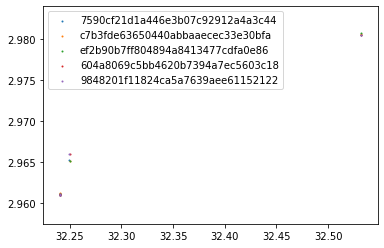

In [6]:
# Plot of a plain static map
for i in unique_suffixes:
    lon = 'longitudes'+'/'+str(i)
    lat = 'latitudes'+'/'+str(i)
    
    plt.scatter(data[lon], data[lat], s=1)
    plt.legend(data['id'])
plt.show()

In [7]:
TOOLS = 'pan,wheel_zoom,zoom_in,zoom_out,box_zoom,reset,save'
# instatiate the tile map to use
tile_provider = get_provider(Vendors.STAMEN_TERRAIN)

def hover(tips):
    '''
    Function to create a hoover inspector tool
    '''
    tool = HoverTool()
    tool.tooltips=tips
    return tool

for i in unique_suffixes:
    lon = 'longitudes'+'/'+str(i)
    lat = 'latitudes'+'/'+str(i)
    
    k = 6378137
    data["LON"] = data[lon] * (k * np.pi/180.0)
    data["LAT"] = np.log(np.tan((90 + data[lat]) * np.pi/360.0)) * k
    
    fig = figure(x_axis_type="mercator", y_axis_type="mercator",
                tools = TOOLS)    
    # add the back ground basemap
    fig.add_tile(tile_provider)
    # Add garden points using Longitude' & 'Latitude  coordinates
    fig.circle(x='LON',
               y='LAT',
               size=10,
               fill_alpha=0.9,
               source=data,
                )
    h = hover([("id", "@id"),
                ("(Long, Lat)", "(@LON, @LAT)")])
    fig.add_tools(h)
    
show(fig)